<a href="https://colab.research.google.com/github/Jiwo0on/project-coco/blob/main/%ED%9D%A1%EC%97%B0%EB%B6%80%EC%8A%A4_%EC%9E%85%EC%A7%80%EC%84%A0%EC%A0%95_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum

# 시스템에 있는 폰트를 읽어서 cache 정보를 만드는 유틸리티
!sudo fc-cache -fv

# removing matplotlib cache
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작

In [ ]:
import pandas as pd
df=pd.read_excel('/content/서울 데이터 - 인구 비례로 빈칸 채움 (수정).xlsx')

In [ ]:
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus = False)

In [ ]:
df

,자치구,행정동,흡연건수,인구 수,대중교통,직장 수,직장인 수,상권 수,월평균 소득금액,총_상주인구_수,유동인구,유흥주점영업,노래방,담배소매업,일반음식점,단란주점영업,상권_당월_매출_금액
0,강남구,논현1동,8.929570e+05,21954,77327,8395,48548,4591.0,3277066.0,23747,1.242410e+06,25.0,32,152,2087,55.0,1.598678e+12
1,강남구,논현2동,7.819234e+05,21003,67132,9228,71748,4954.0,3973993.0,21289,1.086145e+06,7.0,9,42,501,8.0,1.156380e+12
2,강남구,삼성1동,5.119505e+05,12597,68559,7353,73562,4014.0,5098096.0,12969,7.122887e+05,35.0,16,130,1235,13.0,2.079614e+12
3,강남구,삼성2동,7.224136e+05,30724,41662,6267,48407,3468.0,5055114.0,29555,9.921625e+05,10.0,13,61,733,11.0,7.258450e+11
4,강남구,대치1동,2.022615e+06,23829,15258,1406,7459,836.0,7421305.0,24865,2.840051e+06,6.0,24,138,1402,12.0,5.496329e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,중랑구,상봉1동,4.811473e+05,23537,7420,1952,6705,NaN,2969913.0,25886,3.994497e+05,1.0,19,39,233,6.0,3.349762e+11
420,중랑구,면목7동,4.754599e+05,21732,6851,1957,4800,NaN,2655671.0,22266,3.962547e+05,1.0,18,36,215,5.0,2.487627e+11
421,중랑구,면목5동,3.215970e+05,14769,5319,1161,3336,NaN,2233073.0,9670,2.679537e+05,1.0,12,24,146,4.0,5.998511e+10
422,중랑구,면목4동,4.502440e+05,18645,12090,2568,4971,NaN,2573570.0,20660,3.771739e+05,1.0,15,31,185,4.0,8.026445e+10


## Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Processing

In [ ]:
df.head()

,자치구,행정동,흡연건수,인구 수,대중교통,직장 수,직장인 수,상권 수,월평균 소득금액,총_상주인구_수,유동인구,유흥주점영업,노래방,담배소매업,일반음식점,단란주점영업,상권_당월_매출_금액
0,강남구,논현1동,8.929570e+05,21954,77327,8395,48548,4591.0,3277066.0,23747,1.242410e+06,25.0,32,152,2087,55.0,1.598678e+12
1,강남구,논현2동,7.819234e+05,21003,67132,9228,71748,4954.0,3973993.0,21289,1.086145e+06,7.0,9,42,501,8.0,1.156380e+12
2,강남구,삼성1동,5.119505e+05,12597,68559,7353,73562,4014.0,5098096.0,12969,7.122887e+05,35.0,16,130,1235,13.0,2.079614e+12
3,강남구,삼성2동,7.224136e+05,30724,41662,6267,48407,3468.0,5055114.0,29555,9.921625e+05,10.0,13,61,733,11.0,7.258450e+11
4,강남구,대치1동,2.022615e+06,23829,15258,1406,7459,836.0,7421305.0,24865,2.840051e+06,6.0,24,138,1402,12.0,5.496329e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구          424 non-null    object 
 1   행정동          424 non-null    object 
 2   흡연건수         424 non-null    float64
 3   인구 수         424 non-null    int64  
 4   대중교통         424 non-null    int64  
 5   직장 수         424 non-null    int64  
 6   직장인 수        424 non-null    int64  
 7   상권 수         73 non-null     float64
 8   월평균 소득금액     424 non-null    float64
 9   총_상주인구_수     424 non-null    int64  
 10  유동인구         424 non-null    float64
 11  유흥주점영업       423 non-null    float64
 12  노래방          424 non-null    int64  
 13  담배소매업        424 non-null    int64  
 14  일반음식점        424 non-null    int64  
 15  단란주점영업       421 non-null    float64
 16  상권_당월_매출_금액  421 non-null    float64
dtypes: float64(7), int64(8), object(2)
memory usage: 56.4+ KB


In [ ]:
df.isnull().sum()

흡연건수           0
인구 수           0
대중교통           0
직장 수           0
직장인 수          0
월평균 소득금액       0
총_상주인구_수       0
유동인구           0
유흥주점영업         0
노래방            0
담배소매업          0
일반음식점          0
단란주점영업         0
상권_당월_매출_금액    0
dtype: int64

In [ ]:
# 상권수 값이 없어서 없애줌
df.drop(['상권 수'],axis=1, inplace=True)

In [ ]:
df.drop(['자치구'],axis=1, inplace=True)

In [ ]:
df.drop(['행정동'],axis=1, inplace=True)

In [ ]:
df.drop(['총_상주인구_수'],axis=1, inplace=True)

In [ ]:
df.drop(['유동인구'],axis=1, inplace=True)

In [ ]:
df.drop(['인구 수'],axis=1, inplace=True)

In [ ]:
# na 삭제
df.dropna(inplace=True)

In [ ]:
df.shape

(417, 14)

In [ ]:
from scipy import stats

### Normal distribution으로 변경(Take log)

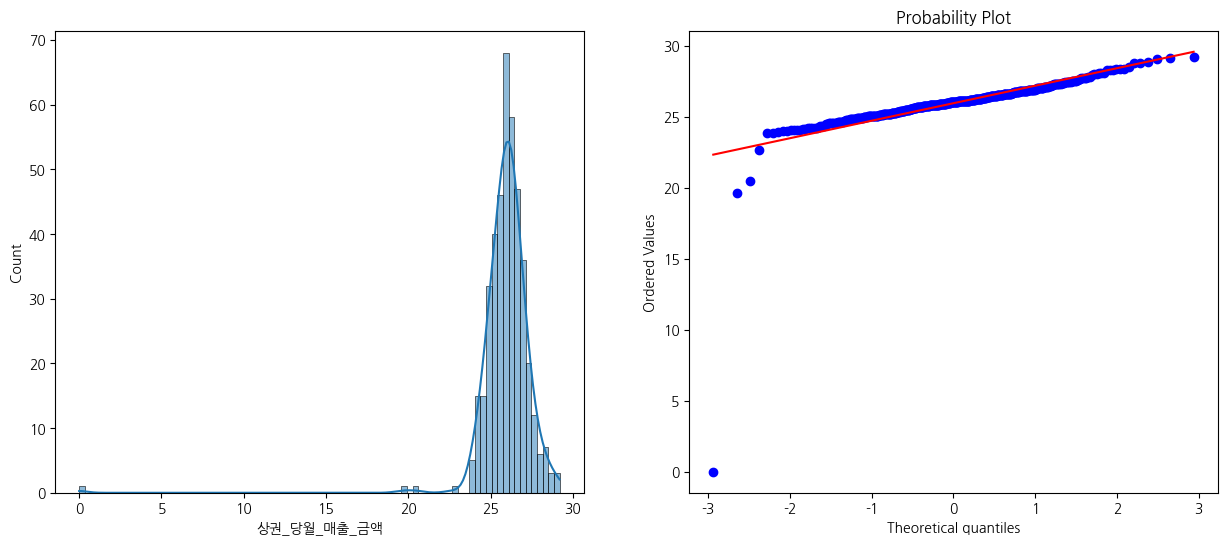

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df["상권_당월_매출_금액"], ax =axs[0], kde=True)
stats.probplot(df["상권_당월_매출_금액"], dist='norm', fit=True, plot=axs[1])

plt.show()

In [ ]:
df["흡연건수"]=np.log1p(df["흡연건수"])
df["대중교통"]=np.log1p(df["대중교통"])
df["직장 수"]=np.log1p(df["직장 수"])
df["직장인 수"]=np.log1p(df["직장인 수"])
df["월평균 소득금액"]=np.log1p(df["월평균 소득금액"])
df["유흥주점영업"]=np.log1p(df["유흥주점영업"])
df["노래방"]=np.log1p(df["노래방"])
df["담배소매업"]=np.log1p(df["담배소매업"])
df["일반음식점"]=np.log1p(df["일반음식점"])
df["단란주점영업"]=np.log1p(df["단란주점영업"])
df["상권_당월_매출_금액"]=np.log1p(df["상권_당월_매출_금액"])

## Model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
def get_rmse(model):
  pred=model.predict(X_test)
  mse=mean_squared_error(y_test,pred)
  rmse=np.sqrt(mse)
  return rmse

def get_rmses(models):
  rmses=[]
  for model in models:
    rmse=get_rmse(model)
    rmses.append(rmse)
  return rmses

In [ ]:
y_target = df['흡연건수']
X_features=df.drop(['흡연건수'],axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [ ]:
X_train.shape

(333, 10)

In [ ]:
X_test.shape

(84, 10)

In [ ]:
y_train.shape

(333,)

### 데이터의 scale이 다르기 때문에 StandardSclaer로 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_scaled_d = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_scaled_d

array([[-0.46752798, -0.58279447, -0.55821099, ..., -0.86607003,
        -0.62582512, -0.87573248],
       [ 0.31242884,  0.00685508,  0.60806162, ..., -0.75004191,
         0.31331239, -0.009895  ],
       [ 0.33600365, -0.51701086, -0.50789048, ..., -0.35969276,
        -0.62582512, -0.3636593 ],
       ...,
       [-0.98557884, -0.76886982, -1.12054294, ..., -0.57987653,
         0.05461939, -1.06524921],
       [-1.12199727, -0.9860459 , -0.45841165, ...,  0.49860254,
        -0.62582512, -0.64081326],
       [-0.34551623, -0.25086045, -0.59220398, ..., -0.23320811,
         0.31331239, -0.28156661]])

### Linear Regression, Ridge, Lasso

In [ ]:
# Linear Regression
lr_reg=LinearRegression()
lr_reg.fit(X_scaled_d, y_train)

LinearRegression()

In [ ]:
# Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_scaled_d, y_train)

Ridge()

In [ ]:
# Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_scaled_d, y_train)

Lasso()

In [ ]:
models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


[4.460300155029355, 4.414244952942136, 2.0621880679685973]

In [ ]:
def get_top_bottom_coef(model, n=5):
  coef=pd.Series(model.coef_, index=X_features.columns)
  coef_high=coef.sort_values(ascending=False).head(n)
  coef_low=coef.sort_values(ascending=False).tail(n)
  return coef_high, coef_low

In [ ]:
# 문제 1
lasso_reg.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

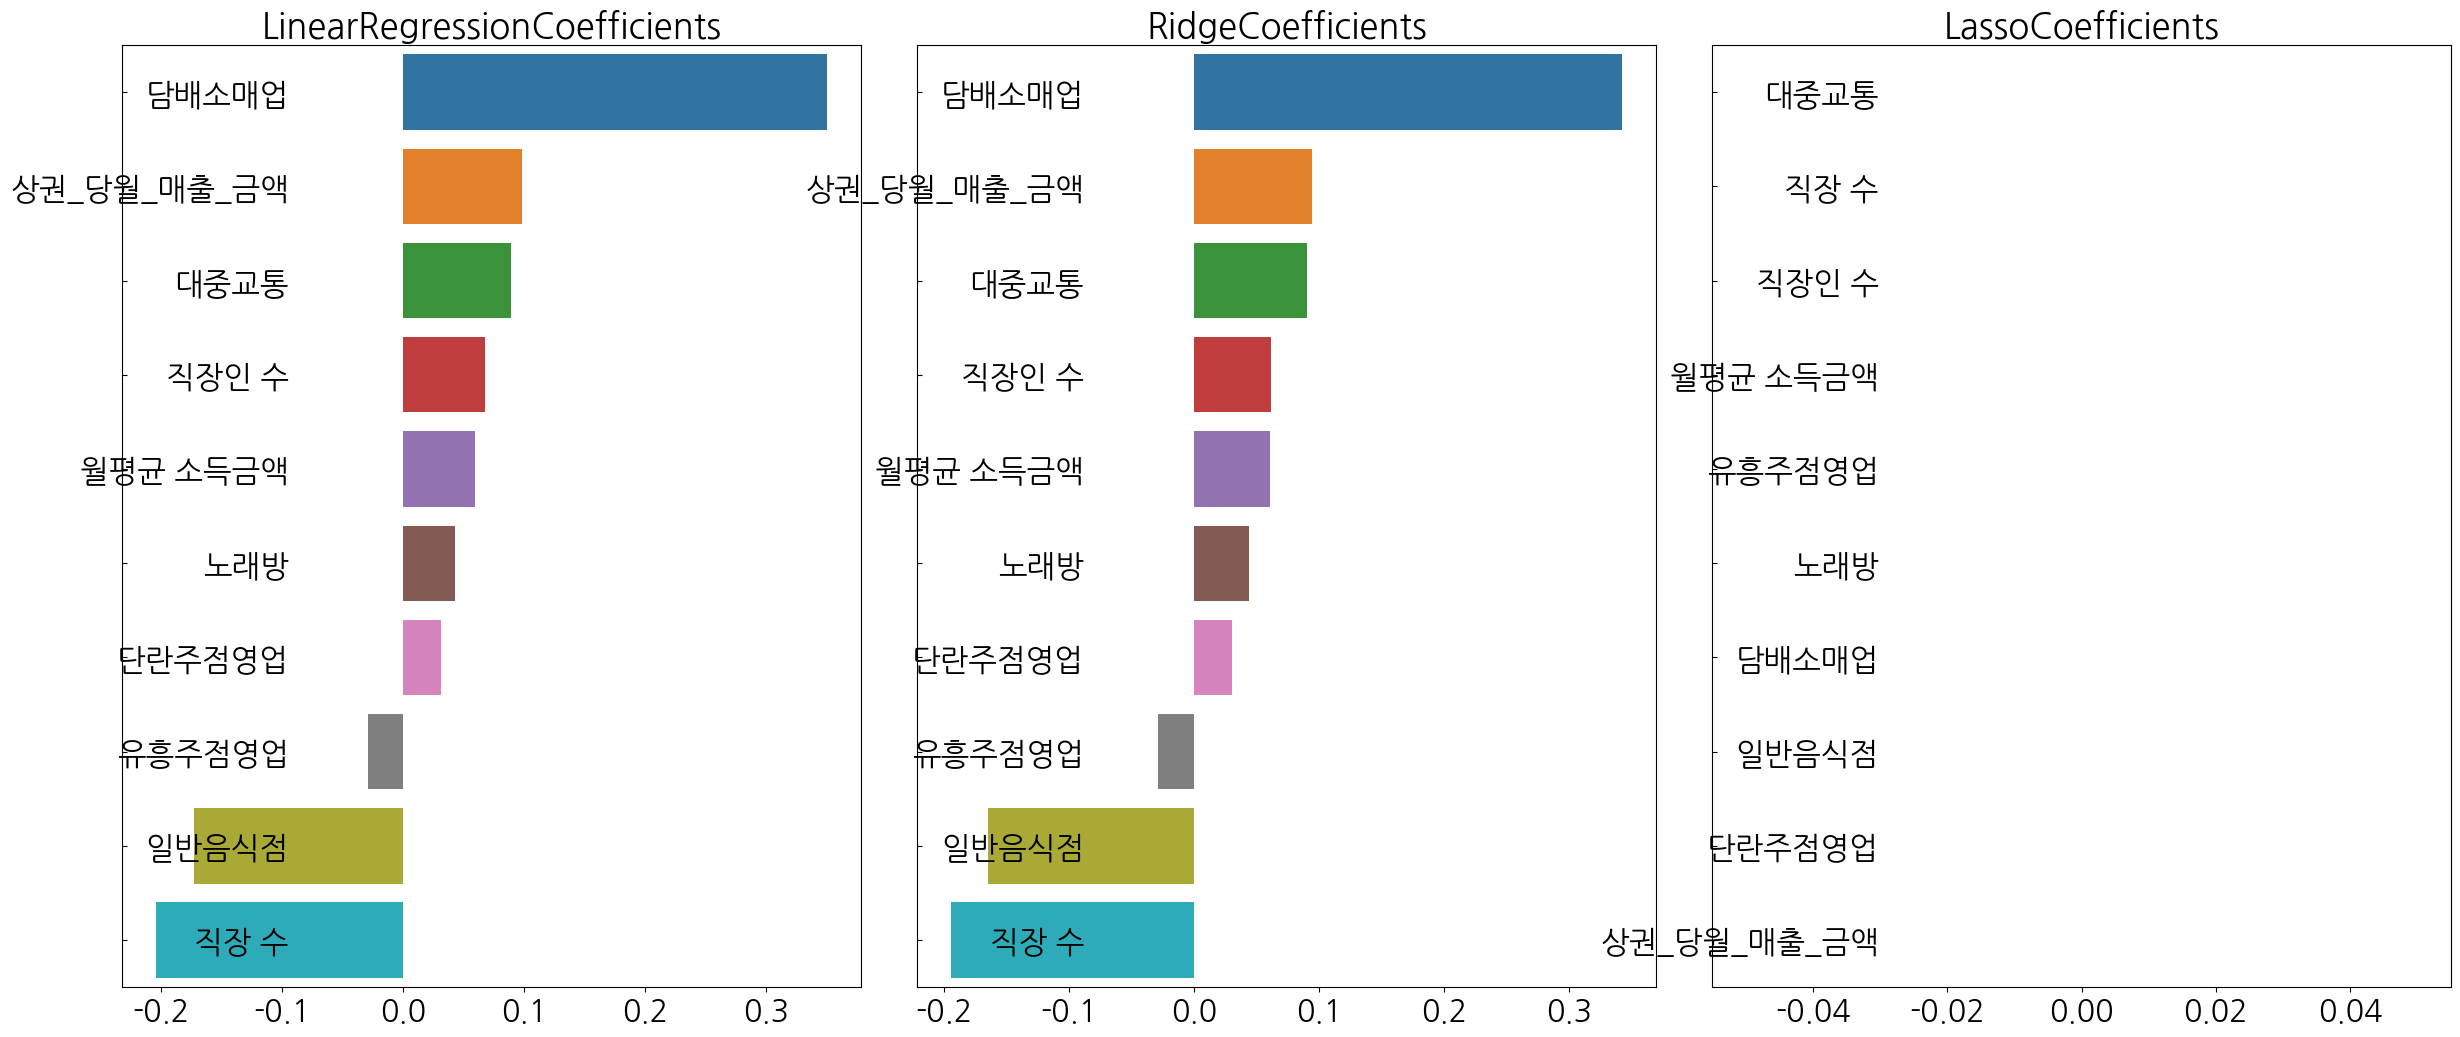

In [ ]:
def visualization_coefficient(models):
  fig, axs=plt.subplots(figsize=(24,10), nrows=1, ncols=3)
  fig.tight_layout()

  for i_num, model in enumerate(models):
    coef_high, coef_low=get_top_bottom_coef(model)
    coef_concat=pd.concat([coef_high, coef_low])

    axs[i_num].set_title(model.__class__.__name__ + 'Coefficients', size=25)
    axs[i_num].tick_params(axis='y', direction='in', pad=-120)
    for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
      label.set_fontsize(22)
    sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

models=[lr_reg, ridge_reg, lasso_reg]
visualization_coefficient(models)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def get_avg_rmse_cv(models):
  for model in models:
    rmse_list=np.sqrt(-cross_val_score(model, X_features, y_target, scoring='neg_mean_squared_error', cv=5))
    rmse_avg=np.mean(rmse_list)
    print('\n{0} CV RMSE 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
    print('\n{0} CV 평균 RMSE : {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))

In [ ]:
models=[lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 리스트: [0.782 0.804 1.582 0.431 2.586]

LinearRegression CV 평균 RMSE : 1.237

Ridge CV RMSE 리스트: [0.785 0.798 1.573 0.428 2.587]

Ridge CV 평균 RMSE : 1.234

Lasso CV RMSE 리스트: [0.534 0.778 1.508 0.505 2.538]

Lasso CV 평균 RMSE : 1.173


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def print_best_params(model, params):
  grid_model=GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=2)
  grid_model.fit(X_features, y_target)
  rmse=np.sqrt(-1*grid_model.best_score_)
  print('{0} 모델 5CV시 최적 평균 RMSE{1}, 최적 alpha: {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))

In [ ]:
ridge_params={'alpha':[0.05,0.1]}
lasso_params={'alpha':[0.001,0.005]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 모델 5CV시 최적 평균 RMSE1.5521, 최적 alpha: {'alpha': 0.1}
Lasso 모델 5CV시 최적 평균 RMSE1.5267, 최적 alpha: {'alpha': 0.005}


### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display = 'diagram')
pipe_lgbm = make_pipeline(StandardScaler(),
                          LGBMRegressor(n_estimate = 400, randomstate=1, metric = 'mse',importance_type='gain'))
pipe_lgbm.fit(X_train, y_train)
pipe_lgbm

[LightGBM] [Warning] Unknown parameter: randomstate
[LightGBM] [Warning] Unknown parameter: n_estimate
[LightGBM] [Warning] Unknown parameter: randomstate
[LightGBM] [Warning] Unknown parameter: n_estimate
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 333, number of used features: 10
[LightGBM] [Info] Start training from score 12.981853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmregressor',
                 LGBMRegressor(importance_type='gain', metric='mse',
                               n_estimate=400, randomstate=1))])

In [ ]:
pipe_lgbm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lgbmregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lgbmregressor__boosting_type', 'lgbmregressor__class_weight', 'lgbmregressor__colsample_bytree', 'lgbmregressor__importance_type', 'lgbmregressor__learning_rate', 'lgbmregressor__max_depth', 'lgbmregressor__min_child_samples', 'lgbmregressor__min_child_weight', 'lgbmregressor__min_split_gain', 'lgbmregressor__n_estimators', 'lgbmregressor__n_jobs', 'lgbmregressor__num_leaves', 'lgbmregressor__objective', 'lgbmregressor__random_state', 'lgbmregressor__reg_alpha', 'lgbmregressor__reg_lambda', 'lgbmregressor__subsample', 'lgbmregressor__subsample_for_bin', 'lgbmregressor__subsample_freq', 'lgbmregressor__n_estimate', 'lgbmregressor__randomstate', 'lgbmregressor__metric'])

In [ ]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV
param_grid = { 'lgbmregressor__max_depth':[3,5,8],
               'lgbmregressor__learning_rate' : [0.1,0.01],
              'lgbmregressor__min_child_samples' : [1,10,20,30],
              'lgbmregressor__min_child_weight' : [1,3,5]}

gs = GridSearchCV(estimator = pipe_lgbm,
                  cv = 5,  # 5겹 교차검증
                  param_grid = param_grid,
                  refit = True,  # 훈련후 바로 적용
                  return_train_score = True # 훈련 성능 리턴
                  )
gs.fit(X_scaled_d, y_train)
print(f'최적의 하이퍼파라미터 세트:{gs.best_params_}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
# 모델 성능 평가 함수 생성

def regression_scores(y_true, y_pred) :
  import numpy as np
  from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

  MSE = mean_squared_error(y_true, y_pred)
  RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
  MAE = np.mean( np.abs((y_true - y_pred) / y_true) )
  NMAE =mean_absolute_error(y_true, y_pred)/ np.mean( np.abs(y_true) )
  MAPE = np.mean( np.abs((y_true - y_pred) / y_true) ) *100
  R2 = r2_score(y_true, y_pred)
  return {'MSE' : np.round(MSE, 3),
          'RMSE' : np.round(RMSE, 3),
          'MAE' : np.round(MAE, 3),
          'NMAE' : np.round(NMAE, 3),
          'MAPE' : np.round(MAPE, 3),
          'R2' : np.round(R2, 3)}

In [ ]:
# 모델 성능 평가
y_pred = gs.predict(X_test_scaled)
regression_scores(y_test, y_pred)

[LightGBM] [Warning] Unknown parameter: randomstate
[LightGBM] [Warning] Unknown parameter: n_estimate
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


{'MSE': 4.064,
 'RMSE': 2.016,
 'MAE': inf,
 'NMAE': 0.052,
 'MAPE': inf,
 'R2': 0.037}

In [ ]:
# 문제 2
import lightgbm as lgb
model = lgb.LGBMRegressor(importance_type='gain')
model.fit(X_scaled_d, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 333, number of used features: 10
[LightGBM] [Info] Start training from score 12.981853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMRegressor(importance_type='gain')

In [ ]:
gain_importance = model.feature_importances_

In [ ]:
# 문제2
feature_names = X_features.columns
gain_importance_df = pd.DataFrame({'Feature': feature_names, 'Gain': gain_importance})
print(gain_importance_df.sort_values(by='Gain', ascending=False))

       Feature        Gain
0         대중교통  298.598676
6        담배소매업  244.586376
1         직장 수  227.463629
3     월평균 소득금액  134.461022
5          노래방  112.811540
7        일반음식점   95.651551
8       단란주점영업   89.663319
9  상권_당월_매출_금액   77.010853
2        직장인 수   69.096679
4       유흥주점영업   36.881538


In [ ]:
y_pred = model.predict(X_test_scaled)
regression_scores(y_test, y_pred)

{'MSE': 4.06,
 'RMSE': 2.015,
 'MAE': inf,
 'NMAE': 0.058,
 'MAPE': inf,
 'R2': 0.038}

## Lightgbm regressor 분석결과
1. 대중교통
2. 담배소매업
3. 직장 수
4.월평균 소득금액
5. 노래방

### XGBoost Regressor

In [ ]:
import xgboost
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(X_scaled_d,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
df.columns

Index(['흡연건수', '대중교통', '직장 수', '직장인 수', '월평균 소득금액', '유흥주점영업', '노래방', '담배소매업',
       '일반음식점', '단란주점영업', '상권_당월_매출_금액'],
      dtype='object')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

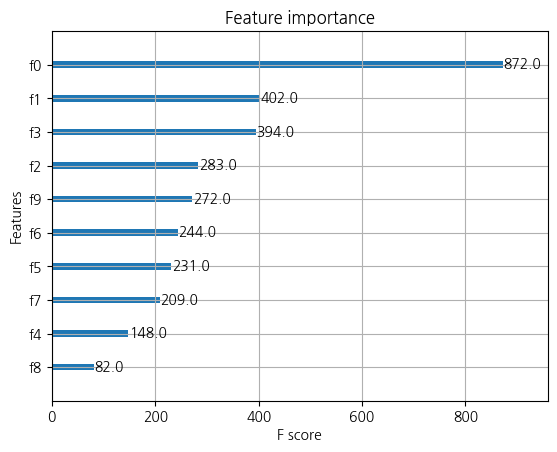

In [ ]:
xgboost.plot_importance(xgb_model)

## Xgboost regressor 분석결과
1. 대중교통
2. 직장 수
3. 월평균 소득금액
4. 직장인 수
5. 상권_당월_매출_금액

In [ ]:
y_pred = xgb_model.predict(X_test_scaled)
regression_scores(y_test, y_pred)

{'MSE': 4.621,
 'RMSE': 2.15,
 'MAE': inf,
 'NMAE': 0.055,
 'MAPE': inf,
 'R2': -0.095}